In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import xgboost as xgb
from scipy import stats
from scipy.stats import norm, skew

from IPython.display import display


In [33]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [34]:
df_train.shape

(1460, 81)

In [35]:
df_test.shape

(1459, 80)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
pd.options.display.max_rows = None
display(100-(df_train.isnull().sum()*100/len(df_train)))

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
Street           100.000000
Alley              6.232877
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
MasVnrType        99.452055
MasVnrArea        99.452055
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          97.465753
BsmtCond          97.465753
BsmtExposure      97.397260
BsmtFinType1      97.465753
BsmtFinSF1       100.000000
BsmtFinType2      97

In [39]:
pd.options.display.max_rows = None
display(100-(df_test.isnull().sum()*100/len(df_test)))

Id               100.000000
MSSubClass       100.000000
MSZoning          99.725840
LotFrontage       84.441398
LotArea          100.000000
Street           100.000000
Alley              7.333790
LotShape         100.000000
LandContour      100.000000
Utilities         99.862920
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st       99.931460
Exterior2nd       99.931460
MasVnrType        98.903358
MasVnrArea        98.971899
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          96.984236
BsmtCond          96.915696
BsmtExposure      96.984236
BsmtFinType1      97.121316
BsmtFinSF1        99.931460
BsmtFinType2      97

There are features with a lot of missing values.

In [40]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Exploratory Data Analysis(EDA)

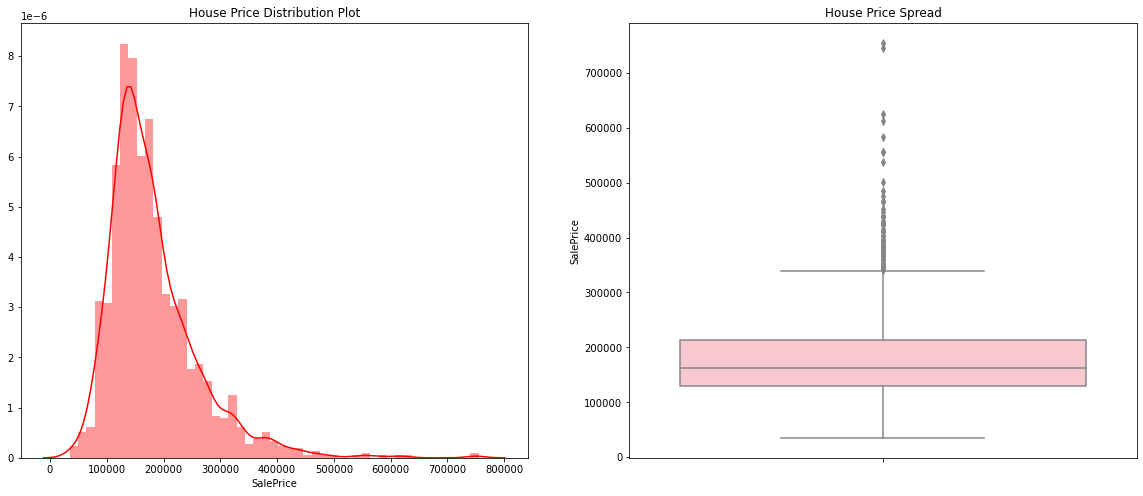

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df_train.SalePrice,color ='red')

plt.subplot(1,2,2)
plt.title('House Price Spread')
ax = sns.boxplot(y = df_train.SalePrice ,color = 'pink' )

plt.show()

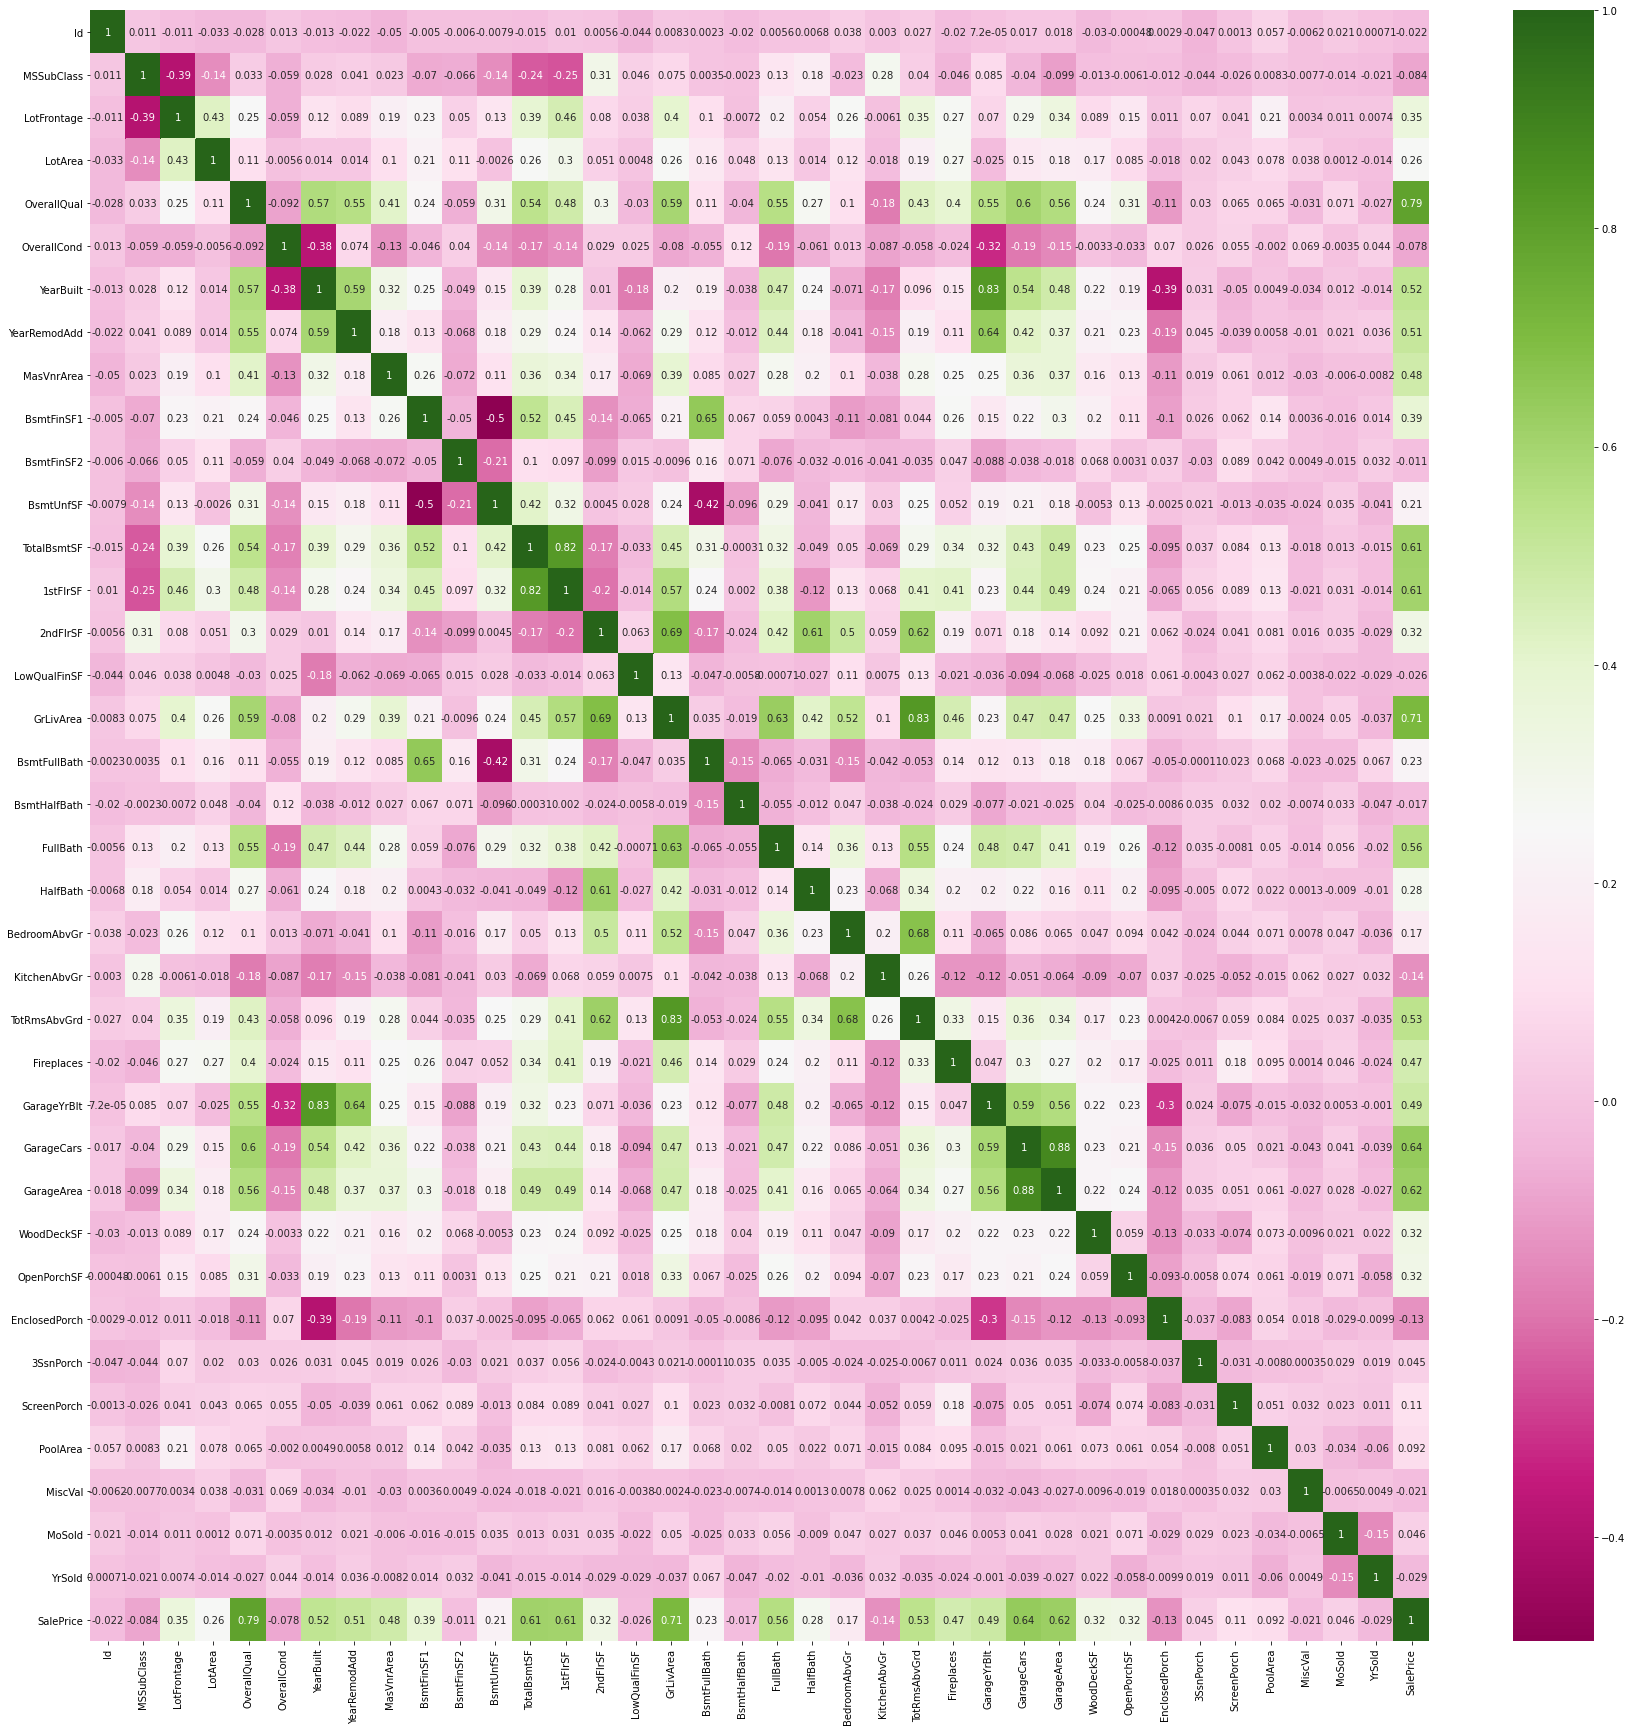

In [42]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="PiYG")
plt.show()

Variable that are highly correlated to the Target variable: 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'Heating', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

# Data Preprocessing


## Feature Engineering 

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A feature is a property shared by independent units on which analysis or prediction is to be done. Features are used by predictive models and influence results. 

### Handling Missing Data
There can be 4 ways to handle the missing data:
- Deleting the rows (loss of information)
- Replace with the most frequent values
- Apply classifier/regressor model to predict missing values
- Apply unsupervised machine learning to predict (clustering)

In [43]:
#Dropping columns with less than 60% missing data
df_train = df_train.drop(columns=['Id'])
df_train = df_train.drop(columns=['Alley'])
df_train = df_train.drop(columns=['FireplaceQu'])
df_train = df_train.drop(columns=['PoolQC'])
df_train = df_train.drop(columns=['Fence'])
df_train = df_train.drop(columns=['MiscFeature'])

df_test = df_test.drop(columns=['Id'])
df_test = df_test.drop(columns=['Alley'])
df_test = df_test.drop(columns=['FireplaceQu'])
df_test = df_test.drop(columns=['PoolQC'])
df_test = df_test.drop(columns=['Fence'])
df_test = df_test.drop(columns=['MiscFeature'])

In [44]:
#Imputing numerical data with mean value
df_train["LotFrontage"] = df_train["LotFrontage"].replace(np.NaN, df_train["LotFrontage"].mean())
df_train["MasVnrArea"] = df_train["MasVnrArea"].replace(np.NaN, df_train["MasVnrArea"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].replace(np.NaN, df_train["GarageYrBlt"].mean())

df_test["LotFrontage"] = df_test["LotFrontage"].replace(np.NaN, df_test["LotFrontage"].mean())
df_test["MasVnrArea"] = df_test["MasVnrArea"].replace(np.NaN, df_test["MasVnrArea"].mean())
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].replace(np.NaN, df_test["GarageYrBlt"].mean())
df_test["BsmtFinSF1"] = df_test["BsmtFinSF1"].replace(np.NaN, df_test['BsmtFinSF1'].mean())
df_test["BsmtFinSF2"] = df_test["BsmtFinSF2"].replace(np.NaN, df_test['BsmtFinSF2'].mean())
df_test["BsmtFullBath"] = df_test["BsmtFullBath"].replace(np.NaN, df_test['BsmtFullBath'].mean())
df_test["BsmtHalfBath"] = df_test["BsmtHalfBath"].replace(np.NaN, df_test['BsmtHalfBath'].mean())
df_test["GarageCars"] = df_test["GarageCars"].replace(np.NaN, df_test['GarageCars'].mean())
df_test["GarageArea"] = df_test["GarageArea"].replace(np.NaN, df_test["GarageArea"].mean())
df_test["BsmtUnfSF"] = df_test["BsmtUnfSF"].replace(np.NaN, df_test['BsmtUnfSF'].mean())
df_test["TotalBsmtSF"] = df_test["TotalBsmtSF"].replace(np.NaN, df_test['TotalBsmtSF'].mean())

In [45]:
#Imputin missing categorical data values with mode value
df_train["BsmtQual"] = df_train["BsmtQual"].replace(np.NaN, df_train["BsmtQual"].mode()[0][:])
df_train["BsmtExposure"] = df_train["BsmtExposure"].replace(np.NaN, df_train["BsmtExposure"].mode()[0][:])
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].replace(np.NaN, df_train["BsmtFinType1"].mode()[0][:])
df_train["BsmtCond"] = df_train["BsmtCond"].replace(np.NaN, df_train["BsmtCond"].mode()[0][:])
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].replace(np.NaN, df_train["BsmtFinType2"].mode()[0][:])
df_train["Electrical"] = df_train["Electrical"].replace(np.NaN, df_train["Electrical"].mode()[0][:])
df_train["GarageType"] = df_train["GarageType"].replace(np.NaN, df_train["GarageType"].mode()[0][:])
df_train["GarageFinish"] = df_train["GarageFinish"].replace(np.NaN, df_train["GarageFinish"].mode()[0][:])
df_train["GarageQual"] = df_train["GarageQual"].replace(np.NaN, df_train["GarageQual"].mode()[0][:])
df_train["GarageCond"] = df_train["GarageCond"].replace(np.NaN, df_train["GarageCond"].mode()[0][:])
df_train["MasVnrType"] = df_train["MasVnrType"].replace(np.NaN, df_train['MasVnrType'].mode()[0][:])

df_test["BsmtQual"] = df_test["BsmtQual"].replace(np.NaN, df_test["BsmtQual"].mode()[0][:])
df_test["BsmtExposure"] = df_test["BsmtExposure"].replace(np.NaN, df_test["BsmtExposure"].mode()[0][:])
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].replace(np.NaN, df_test["BsmtFinType1"].mode()[0][:])
df_test["BsmtCond"] = df_test["BsmtCond"].replace(np.NaN, df_test["BsmtCond"].mode()[0][:])
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].replace(np.NaN, df_test["BsmtFinType2"].mode()[0][:])
df_test["Electrical"] = df_test["Electrical"].replace(np.NaN, df_test["Electrical"].mode()[0][:])
df_test["GarageType"] = df_test["GarageType"].replace(np.NaN, df_test["GarageType"].mode()[0][:])
df_test["GarageFinish"] = df_test["GarageFinish"].replace(np.NaN, df_test["GarageFinish"].mode()[0][:])
df_test["GarageQual"] = df_test["GarageQual"].replace(np.NaN, df_test["GarageQual"].mode()[0][:])
df_test["GarageCond"] = df_test["GarageCond"].replace(np.NaN, df_test["GarageCond"].mode()[0][:])
df_test["MasVnrType"] = df_test["MasVnrType"].replace(np.NaN, df_test['MasVnrType'].mode()[0][:])
df_test["Utilities"] = df_test["Utilities"].replace(np.NaN, df_test['Utilities'].mode()[0][:])
df_test["MSZoning"] = df_test["MSZoning"].replace(np.NaN, df_test['MSZoning'].mode()[0][:])
df_test["SaleType"] = df_test["SaleType"].replace(np.NaN, df_test['SaleType'].mode()[0][:])
df_test["Exterior1st"] = df_test["Exterior1st"].replace(np.NaN, df_test['Exterior1st'].mode()[0][:])
df_test["Exterior2nd"] = df_test["Exterior2nd"].replace(np.NaN, df_test['Exterior2nd'].mode()[0][:])
df_test["KitchenQual"] = df_test["KitchenQual"].replace(np.NaN, df_test['KitchenQual'].mode()[0][:])
df_test["Functional"] = df_test["Functional"].replace(np.NaN, df_test['Functional'].mode()[0][:])

In [46]:
pd.options.display.max_rows = None
display(100-(df_test.isnull().sum()*100/len(df_test)))
#no missing data

MSSubClass       100.0
MSZoning         100.0
LotFrontage      100.0
LotArea          100.0
Street           100.0
LotShape         100.0
LandContour      100.0
Utilities        100.0
LotConfig        100.0
LandSlope        100.0
Neighborhood     100.0
Condition1       100.0
Condition2       100.0
BldgType         100.0
HouseStyle       100.0
OverallQual      100.0
OverallCond      100.0
YearBuilt        100.0
YearRemodAdd     100.0
RoofStyle        100.0
RoofMatl         100.0
Exterior1st      100.0
Exterior2nd      100.0
MasVnrType       100.0
MasVnrArea       100.0
ExterQual        100.0
ExterCond        100.0
Foundation       100.0
BsmtQual         100.0
BsmtCond         100.0
BsmtExposure     100.0
BsmtFinType1     100.0
BsmtFinSF1       100.0
BsmtFinType2     100.0
BsmtFinSF2       100.0
BsmtUnfSF        100.0
TotalBsmtSF      100.0
Heating          100.0
HeatingQC        100.0
CentralAir       100.0
Electrical       100.0
1stFlrSF         100.0
2ndFlrSF         100.0
LowQualFinS

In [47]:
pd.options.display.max_rows = None
display(100-(df_train.isnull().sum()*100/len(df_train)))
#no missing data

MSSubClass       100.0
MSZoning         100.0
LotFrontage      100.0
LotArea          100.0
Street           100.0
LotShape         100.0
LandContour      100.0
Utilities        100.0
LotConfig        100.0
LandSlope        100.0
Neighborhood     100.0
Condition1       100.0
Condition2       100.0
BldgType         100.0
HouseStyle       100.0
OverallQual      100.0
OverallCond      100.0
YearBuilt        100.0
YearRemodAdd     100.0
RoofStyle        100.0
RoofMatl         100.0
Exterior1st      100.0
Exterior2nd      100.0
MasVnrType       100.0
MasVnrArea       100.0
ExterQual        100.0
ExterCond        100.0
Foundation       100.0
BsmtQual         100.0
BsmtCond         100.0
BsmtExposure     100.0
BsmtFinType1     100.0
BsmtFinSF1       100.0
BsmtFinType2     100.0
BsmtFinSF2       100.0
BsmtUnfSF        100.0
TotalBsmtSF      100.0
Heating          100.0
HeatingQC        100.0
CentralAir       100.0
Electrical       100.0
1stFlrSF         100.0
2ndFlrSF         100.0
LowQualFinS

### Encoding Categorical Data
Types of Encoding: 
1. Nominal Encoding : (Categorical features where rank is not important)
    - One Hot encoding
    - One Hot encodng with many categories - We take 10(or more) most frequently occuring categories and group them into 1       category.
    - Mean encoding - Replace the label with mean Eg; Pincode
2. Ordinal Encoding : (Categorical features where rank is important)
    - Label encoding
    - Target guided ordinal encoding
3. Count/Frequency Encoding: Can be used for both nominal and ordinal features

In [48]:
cat_features = list(df_train.select_dtypes(include='object').columns)
print(cat_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [49]:
for col in cat_features:
    print(col,"   ", df_train[col].unique())

MSZoning     ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street     ['Pave' 'Grvl']
LotShape     ['Reg' 'IR1' 'IR2' 'IR3']
LandContour     ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities     ['AllPub' 'NoSeWa']
LotConfig     ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope     ['Gtl' 'Mod' 'Sev']
Neighborhood     ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType     ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle     ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl     ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

Ordinal Categorical Features: 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond' 

Nominal Categorical features: 'MSZoning','Street','LotShape', 'LandContour', 'Utilities', 'LotConfig',
 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'BsmtFinType1',
 'BsmtFinType2', 'Heating', 'CentralAir','Electrical','Functional',
 'GarageType', 'PavedDrive', 'SaleCondition'

1. One Hot Encoding for Features with large number of Categories

In [50]:
for col in cat_features:
    print(col," : ",len(df_train[col].unique())," labels")

MSZoning  :  5  labels
Street  :  2  labels
LotShape  :  4  labels
LandContour  :  4  labels
Utilities  :  2  labels
LotConfig  :  5  labels
LandSlope  :  3  labels
Neighborhood  :  25  labels
Condition1  :  9  labels
Condition2  :  8  labels
BldgType  :  5  labels
HouseStyle  :  8  labels
RoofStyle  :  6  labels
RoofMatl  :  8  labels
Exterior1st  :  15  labels
Exterior2nd  :  16  labels
MasVnrType  :  4  labels
ExterQual  :  4  labels
ExterCond  :  5  labels
Foundation  :  6  labels
BsmtQual  :  4  labels
BsmtCond  :  4  labels
BsmtExposure  :  4  labels
BsmtFinType1  :  6  labels
BsmtFinType2  :  6  labels
Heating  :  6  labels
HeatingQC  :  5  labels
CentralAir  :  2  labels
Electrical  :  5  labels
KitchenQual  :  4  labels
Functional  :  7  labels
GarageType  :  6  labels
GarageFinish  :  3  labels
GarageQual  :  5  labels
GarageCond  :  5  labels
PavedDrive  :  3  labels
SaleType  :  9  labels
SaleCondition  :  6  labels


Features with large number of categories: 'Neighourhood', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Condition1',
    'Condition2', 'HouseStyle', 'RoofMatl'

In [51]:
top_12 = [x for x in df_train['Neighborhood'].value_counts().sort_values(ascending=False).head(12).index]
top_12

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'Gilbert',
 'NridgHt',
 'Sawyer',
 'NWAmes',
 'SawyerW',
 'BrkSide',
 'Crawfor']

In [52]:
#Applying one hot encoding on the most frequently occuring top 12 results and labeling 1 if the condition is true
for label in top_12:
    df_train[label] = np.where(df_train['Neighborhood']==label , 1, 0)
    df_test[label] = np.where(df_test['Neighborhood']==label , 1, 0)



In [53]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label , 1, 0)

        
one_hot_top_x(df_train, 'Neighborhood',top_12)
df_train = df_train.drop(columns=['Neighborhood'])

one_hot_top_x(df_test, 'Neighborhood',top_12)
df_test = df_test.drop(columns=['Neighborhood'])

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_Sawyer,Neighborhood_NWAmes,Neighborhood_SawyerW,Neighborhood_BrkSide,Neighborhood_Crawfor
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Applying one hot encoding on the most frequently occuring top 5 results and labeling 1 if the condition is true
feat_top_5 = [ 'Exterior1st', 'Exterior2nd', 'SaleType', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl']

for feat in feat_top_5:
    top_5 = [x for x in df_train[feat].value_counts().sort_values(ascending=False).head(5).index]
    one_hot_top_x(df_train, feat ,top_5)
    one_hot_top_x(df_test, feat ,top_5)

df_train = df_train.drop(columns=feat_top_5)
df_test = df_test.drop(columns=feat_top_5)

In [55]:
df_train.shape

(1460, 126)

In [56]:
df_test.shape

(1459, 125)

2. One Hot Encoding for ordinary categorical Features

In [57]:
feat_one_hot=['MSZoning','Street','LotShape', 'LandContour', 'Utilities', 'LotConfig',
 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'BsmtFinType1',
 'BsmtFinType2', 'Heating', 'CentralAir','Electrical','Functional',
 'GarageType', 'PavedDrive', 'SaleCondition','GarageFinish']


def dummies(x,df):
    temp = pd.get_dummies(df[x], prefix = x , drop_first = True).astype('int32')
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

for ft in feat_one_hot:
    df_train = dummies(ft,df_train)
    df_test = dummies(ft,df_test)

In [58]:
df_train.shape

(1460, 180)

In [59]:
df_test.shape

(1459, 175)

In [60]:
for x in df_train.columns:
        if x not in df_test.columns:
            print(x)

SalePrice
Utilities_NoSeWa
Heating_GasA
Heating_OthW
Electrical_Mix


In [61]:
df_train.drop(columns = ['Utilities_NoSeWa','Heating_GasA','Heating_OthW','Electrical_Mix'], inplace=True)

3. Encoding Ordinal features using Label encoding 

In [62]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [63]:
ordinal_feat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

qual_map={
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1
}

#Here, Ex:'Excellent' Gd:'Good' Fa:'Fair' TA:'Typical' Po:'Poor'

def ord_encode(df):
    for qual in ordinal_feat:
        df[qual+'_ord'] = df[qual].map(qual_map)
        df.drop(columns=[qual], inplace=True)
    
ord_encode(df_train)
ord_encode(df_test)

In [64]:
qual_map={
    'Gd': 5,
    'Av': 4,
    'Mn': 3,
    'No': 2,
    'NB': 1
}

#Here, Gd:'Good Exposure' Av:'Average Exposure' Mn:'Minimum Exposure' No:'No Exposure' NB:'No Basement'

def ord_encode_Expo(df):
        df['BsmtExposure'+'_ord'] = df['BsmtExposure'].map(qual_map)
        df.drop(columns=['BsmtExposure'], inplace=True)
    
ord_encode_Expo(df_train)
ord_encode_Expo(df_test)

In [65]:
df_train.shape

(1460, 176)

In [66]:
df_test.shape

(1459, 175)

## Feature Selection for numerical Data

In [67]:
num_features= ['MSSubClass',
'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
'2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',
'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

1. Removing constant features using Variance Threshold


In [68]:
# Threshold=0 means it will remove all the low variance features
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_train[num_features])

VarianceThreshold(threshold=0)

In [69]:
constant_columns = [x for x in num_features
                    if x not in df_train[num_features].columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [70]:
print(var_thres.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


- No Duplicate or constant features present in the dataset.

2. Dropping Features Using Pearson Correlation

In [71]:
df_x = df_train[num_features]
y_train = df_train['SalePrice']

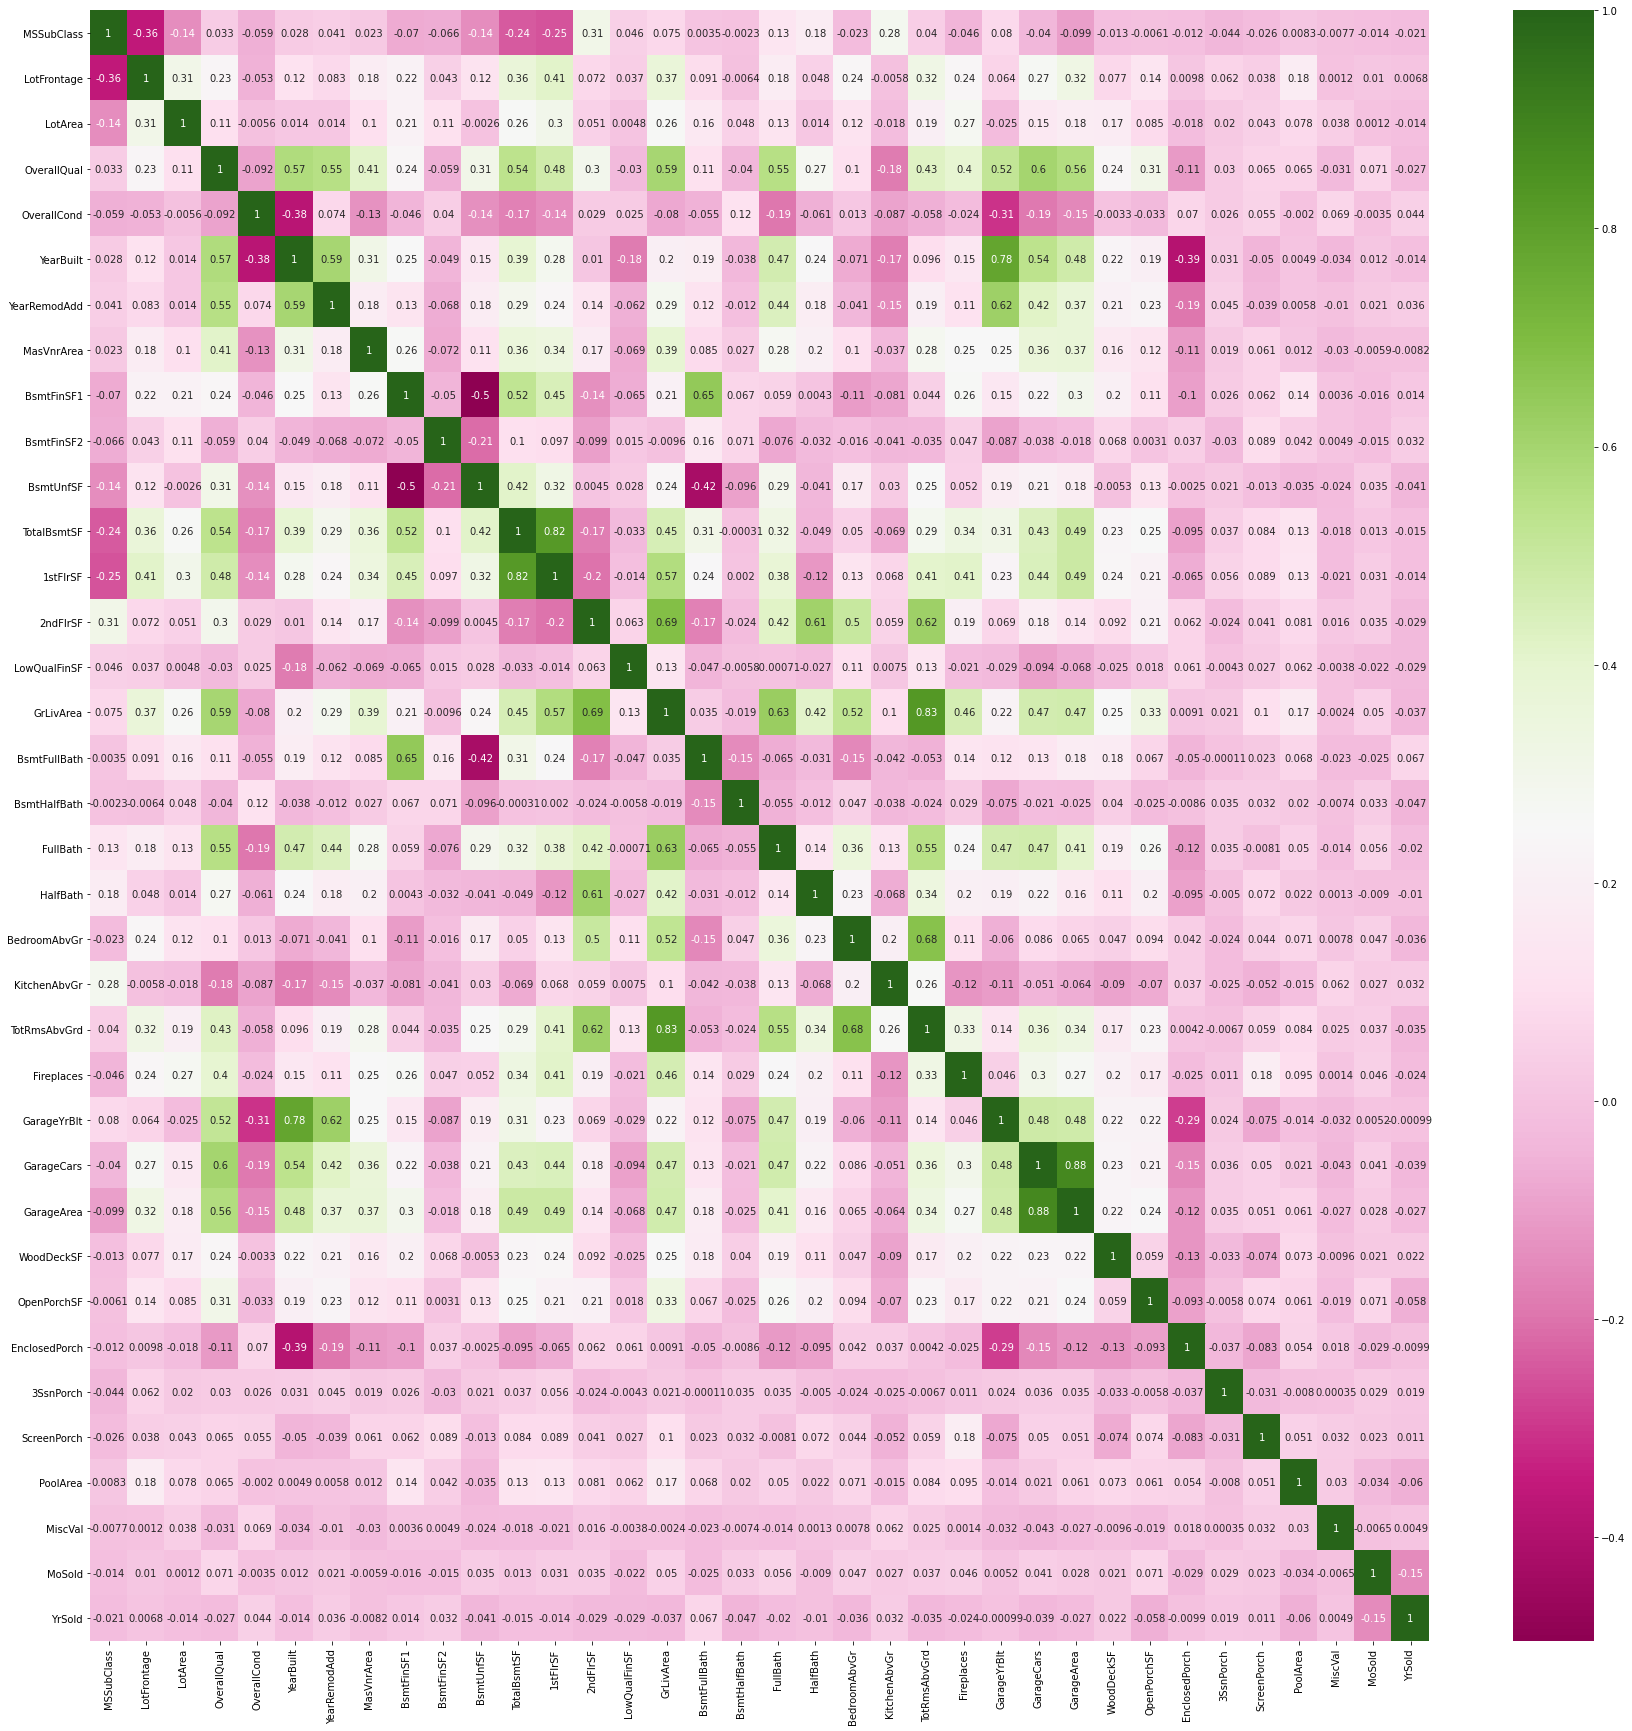

In [72]:
#Pearson Correlation Chart
plt.figure(figsize = (30, 30))
sns.heatmap(df_x.corr(), annot = True, cmap="PiYG")
plt.show()

In [73]:
# Finding out how many features are correlated to each other to avoid having 
# duplicate features in our model.

def correlation(df, thres):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_feat = correlation(df_x, 0.7)
len(set(corr_feat))

4

In [74]:
# Duplicate Features
print(corr_feat)

{'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'}


In [75]:
df_train = df_train.drop(corr_feat, axis=1)
df_test = df_test.drop(corr_feat, axis=1)

3. Using Information gain - mutual information for Feature Selection

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

In [76]:
mutual_info = mutual_info_regression(df_x, y_train)
mutual_info

array([2.82353977e-01, 2.02258084e-01, 1.60156916e-01, 5.75618202e-01,
       1.07491500e-01, 3.67032516e-01, 2.48722398e-01, 9.88762583e-02,
       1.44431438e-01, 4.45793612e-03, 1.19783997e-01, 3.66922844e-01,
       3.10086904e-01, 1.99920313e-01, 0.00000000e+00, 4.82884832e-01,
       1.73983445e-02, 1.83218071e-02, 2.47655873e-01, 6.99148029e-02,
       6.22393615e-02, 8.70707595e-03, 2.15558449e-01, 1.74116780e-01,
       2.99161754e-01, 3.62656304e-01, 3.66124599e-01, 1.14170745e-01,
       1.45656231e-01, 9.84647229e-03, 5.66567652e-04, 2.73717708e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.17119851e-04])

In [77]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_x.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.575618
GrLivArea        0.482885
YearBuilt        0.367033
TotalBsmtSF      0.366923
GarageArea       0.366125
GarageCars       0.362656
1stFlrSF         0.310087
GarageYrBlt      0.299162
MSSubClass       0.282354
YearRemodAdd     0.248722
FullBath         0.247656
TotRmsAbvGrd     0.215558
LotFrontage      0.202258
2ndFlrSF         0.199920
Fireplaces       0.174117
LotArea          0.160157
OpenPorchSF      0.145656
BsmtFinSF1       0.144431
BsmtUnfSF        0.119784
WoodDeckSF       0.114171
OverallCond      0.107491
MasVnrArea       0.098876
HalfBath         0.069915
BedroomAbvGr     0.062239
ScreenPorch      0.027372
BsmtHalfBath     0.018322
BsmtFullBath     0.017398
EnclosedPorch    0.009846
KitchenAbvGr     0.008707
BsmtFinSF2       0.004458
3SsnPorch        0.000567
YrSold           0.000517
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
dtype: float64

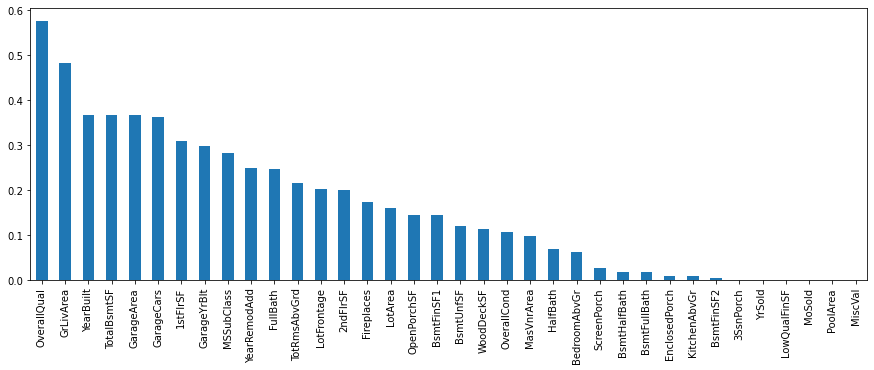

In [78]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [79]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(df_x, y_train)

SelectPercentile(percentile=40,
                 score_func=<function mutual_info_regression at 0x0000021A60C79670>)

In [80]:
selected_top_columns.get_support()

array([ True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [81]:
df_x.columns[selected_top_columns.get_support()]

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [82]:
unimp_columns = [x for x in num_features
                    if x not in df_x.columns[selected_top_columns.get_support()]]
print(unimp_columns)

['LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [83]:
for x in unimp_columns:
    df_train.drop(columns=[x], axis=1, inplace=True)
    df_test.drop(columns=[x], axis=1, inplace=True)

### Outlier Detection


In [84]:
num_vars = ['MSSubClass', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
        'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'ExterQual_ord', 
        'ExterCond_ord', 'BsmtQual_ord', 'BsmtCond_ord','BsmtExposure_ord',
        'HeatingQC_ord', 'KitchenQual_ord', 'GarageQual_ord', 'GarageCond_ord']

In [85]:
z = np.abs(stats.zscore(df_train[num_vars]))
threshold = 3
print(np.where(z > 3))

(array([   3,    8,    9,    9,   29,   30,   30,   42,   48,   61,   62,
         81,   88,   88,   93,   93,   95,   98,  102,  104,  106,  106,
        110,  118,  124,  125,  125,  142,  146,  149,  154,  154,  165,
        171,  171,  172,  172,  174,  175,  179,  181,  185,  185,  187,
        187,  190,  197,  197,  209,  224,  231,  233,  239,  242,  246,
        246,  246,  246,  250,  262,  268,  268,  269,  269,  277,  290,
        291,  291,  291,  300,  304,  304,  304,  307,  312,  313,  314,
        314,  320,  323,  325,  329,  329,  332,  335,  339,  341,  341,
        352,  352,  355,  365,  365,  375,  375,  375,  381,  383,  383,
        383,  386,  390,  398,  398,  398,  398,  408,  410,  410,  411,
        420,  438,  439,  440,  446,  450,  450,  456,  456,  461,  466,
        482,  482,  488,  488,  488,  488,  496,  496,  502,  502,  508,
        514,  514,  520,  523,  523,  531,  531,  533,  533,  534,  535,
        544,  545,  555,  566,  568,  579,  583,  

In [86]:
df = pd.concat((df_train.drop(columns=['SalePrice']), df_test))

### Transforming the skewed features

Normally distributed features are an assumption in Statistical algorithms. Deep learning & Regression-type algorithms also benefit from normally distributed data.
Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ Logarithm transformation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A61D52130>,
      dtype=object)

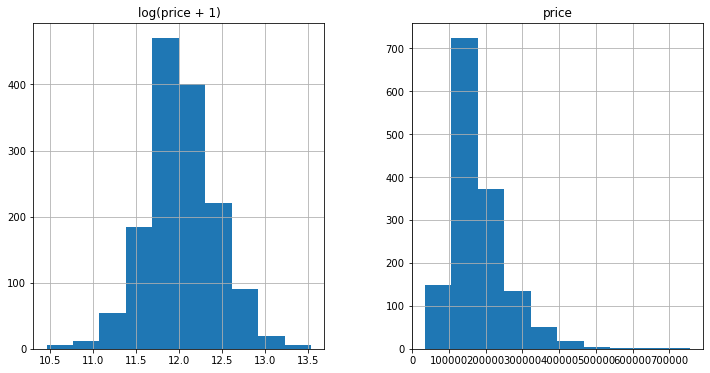

In [87]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [88]:
numeric_cols = ['MSSubClass', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
        'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']

df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

skewed_feats = df_train[numeric_cols].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

### Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization. When to use feature scaling:
- Algorithms which use gradient descent or euclidean distance for eg: Knn or K means clustering etc

When to not use feature scaling:
- Algorithms like Decision Tree, Random Forest, or XGBoost etc.

NOTE: We are gonna skip scaling in this model as we have applied logarithmic transformation to treat skewed features.

### Preparing the dataset for model fitting and Splitting the data into training set and test set

In [90]:
x_train = df[:df_train.shape[0]]
x_test = df[df_train.shape[0]:]
y_train = df_train.SalePrice

In [102]:
x_test.head()

,MSSubClass,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,GarageCars,...,GarageFinish_Unf,ExterQual_ord,ExterCond_ord,BsmtQual_ord,BsmtCond_ord,HeatingQC_ord,KitchenQual_ord,GarageQual_ord,GarageCond_ord,BsmtExposure_ord
0,3.044522,4.394449,5,1961,1961,6.783325,0.000000,6.799056,1,1.0,...,1,3,3,3,3,3,3,3,3,2
1,3.044522,4.406719,6,1958,1958,7.192934,0.000000,7.192934,1,1.0,...,1,3,3,3,3,3,4,3,3,2
2,4.110874,4.317488,5,1997,1998,6.834109,6.553933,7.396335,2,2.0,...,0,3,3,4,3,4,3,3,3,2
3,4.110874,4.369448,6,1998,1998,6.831954,6.520621,7.380879,2,2.0,...,0,3,3,3,3,5,4,3,3,2
4,4.795791,3.784190,8,1992,1992,7.155396,0.000000,7.155396,2,2.0,...,0,4,3,4,3,5,4,3,3,2


# Model Building

Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning parameter.

In [93]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

This problem uses the mean squared error, mse as the scoring metric. However, this metric returns negative values. Therefore, we need to use abs(mse) to get positive values.

The mse takes the errors: difference between the actual values and those predicted by the model, and find the mean of the squares.

It isn’t null and the negative sign does not make it ineffective. A high mse means that the error is large.

## 1. Multiple linear Regression Model

In [111]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)
pred = mlr.predict(x_test)

In [114]:
rmse_cv(mlr).min()

0.11526282261394384

## 2. Ridge Regression

In [94]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [95]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

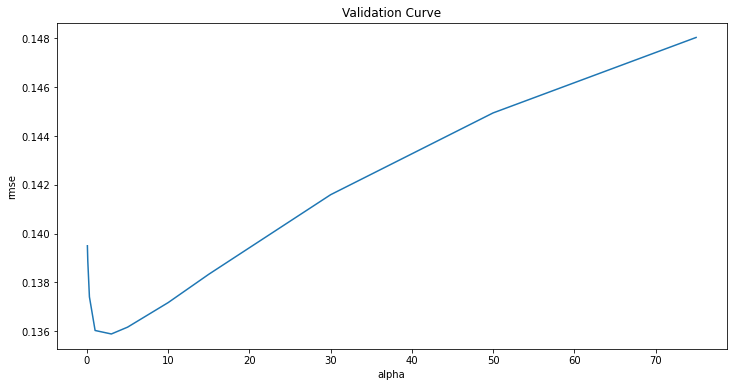

In [96]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 3 is about right based on the plot above.

In [97]:
cv_ridge.min()

0.13588234585285017

## 3. Lasso Regression

In [98]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)

In [99]:
rmse_cv(model_lasso).mean()

0.13582028759027517

## 4. XGBoost Model

In [105]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

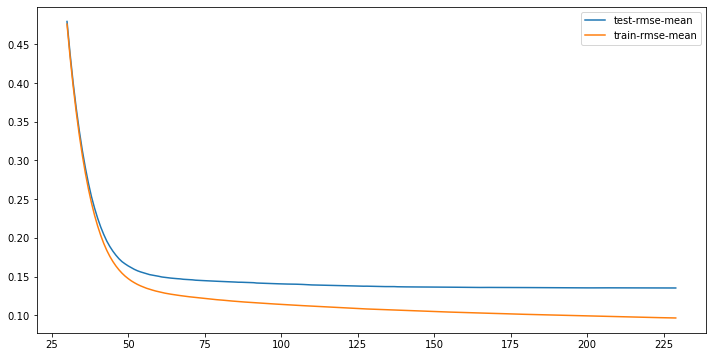

In [106]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [108]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
xgb_preds = np.expm1(model_xgb.predict(x_test))